In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import initial_grid as ig
carmap = ig.initial_grid(4)

In [4]:
def neighbors(carmap, i, j):
    """ x = j
        y = i
    """
    directions = {'n':(i-1,j), 'e':(i,j+1), 'w':(i,j-1), 's':(i+1,j)}
    if i == 0:
        directions['n'] = (carmap.shape[0]-1, j)
    if i == carmap.shape[0]-1:
        directions['s'] = (0,j)
    if j == 0:
        directions['w'] = (i,carmap.shape[1]-1)
    if j == carmap.shape[0]-1:
        directions['e'] = (i,0)
    return directions

In [5]:
neighbors(carmap, 0,15)

{'e': (0, 16), 'n': (14, 15), 's': (1, 15), 'w': (0, 14)}

In [6]:
#direction dictionary is dir_
dir_ = {'n': 2,
        'e': 0,
        's': 3,
        'w': 1}

for d in dir_:
    print(d)

n
e
w
s


In [12]:
def motion(carmap, lim):
    cm = carmap
    new_m = np.zeros_like(cm)
    new_m[:] = cm[:]
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            n = neighbors(cm, i, j)
            for k in dir_:
                current = (i,j, dir_[k])
                new = n[k] + tuple([dir_[k]])
                if not cm[current] == 0:
                    cars = cm[current]
                    if cm[new] < lim:
                        move = cars // 2
                        res = lim - cm[new] - move
                        if res < 0:
                            new_m[current] -= lim - move
                            new_m[new] += lim - move
                        else:
                            new_m[current] -= move
                            new_m[new] += move
    return new_m 

In [13]:
def plot(carmap, view=[]):
    if not len(view) ==0:
        dir_ = {'n': 2,
                'e': 0,
                's': 3,
                'w': 1}
        f = np.zeros_like(carmap[:,:,0])
        for l in view:
            f += carmap[:,:,dir_[l]]
        plt.imshow(f)
    else:
        plt.imshow(carmap.sum(axis=2))
    plt.colorbar()

In [14]:
def clear_column(carmap, i):
    grid[:,i,1] = 0
    grid[:,i,2] = 0
    
def clear_row(carmap, i):
    grid[i,:,0] = 0
    grid[i,:,3] = 0

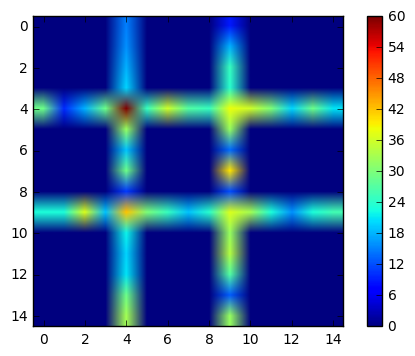

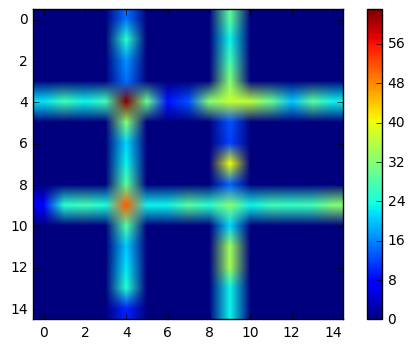

In [15]:
import initial_grid as ig
carmap = ig.initial_grid(4)
plot(carmap)
plt.show()
for t in range(10):
    carmap = motion(carmap, lim=10)
plot(carmap)